In [23]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import tikzplotlib

In [46]:
out = open("seq_opt_experiment_output.txt", "r").read().splitlines()

In [47]:
i = 0

accs = [] 
for x in out: 
    if "Inference" in x: 
        accuracy = float(x.split(":")[1])
        accs.append(accuracy)

In [48]:
MNIST = [accs[i] for i in range(0, len(accs), 5)]
GSC = [accs[i] for i in range(1, len(accs), 5)]
GTSRB = [accs[i] for i in range(2, len(accs), 5)]
CIFAR10 = [accs[i] for i in range(3, len(accs), 5)]
SVHN = [accs[i] for i in range(4, len(accs), 5)]

In [49]:
MNIST

[0.9852, 0.4456, 0.2632, 0.2469, 0.2792]

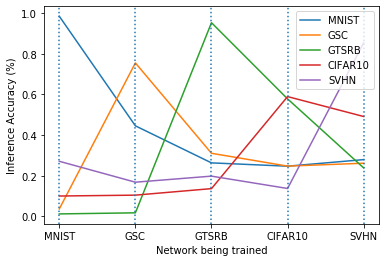

In [61]:
plt.plot(MNIST, label="MNIST")
plt.plot(GSC, label="GSC")
plt.plot(GTSRB, label="GTSRB")
plt.plot(CIFAR10, label="CIFAR10")
plt.plot(SVHN, label="SVHN")

plt.axvline(0, linestyle=":")
plt.axvline(1, linestyle=":")
plt.axvline(2, linestyle=":")
plt.axvline(3, linestyle=":")
plt.axvline(4, linestyle=":")

plt.ylabel("Inference Accuracy (%)")
plt.xticks(np.arange(5), 
           ('MNIST', 'GSC', 'GTSRB', 'CIFAR10', 'SVHN'),
           rotation = 0
          )

plt.xlabel("Network being trained")

plt.legend()

# tikzplotlib.save("sequential_optimisation.tex")
# plt.show()

In [32]:
joint_res = open("../k10/out_k10.log", "r").read().splitlines()

In [33]:
def get_info(s): 
    steps, accs = s.split(",")
    step_n = int(steps.split(" ")[1])
    acc = float(accs.split(":")[1])
    return (step_n, acc)

current = []
all_res = [] 

for x in joint_res: 
    if "Validation accuracy" in x: 
        step_n, acc = get_info(x) 
        if step_n == 0 and current: 
            all_res.append(current)
            current = [] 
        current.append(acc)

In [34]:
all_res[2]

[0.009897,
 0.217023,
 0.667458,
 0.749327,
 0.804751,
 0.82692,
 0.838321,
 0.84331,
 0.857324,
 0.859857,
 0.866825,
 0.866033,
 0.870784,
 0.877672,
 0.882423,
 0.875693,
 0.882423,
 0.887094,
 0.88939,
 0.88947,
 0.896279]

In [35]:
MNIST = [all_res[i] for i in range(0, len(all_res), 5)]
GSC = [all_res[i] for i in range(1, len(all_res), 5)]
GTSRB = [all_res[i] for i in range(2, len(all_res), 5)]
CIFAR10 = [all_res[i] for i in range(3, len(all_res), 5)]
SVHN = [all_res[i] for i in range(4, len(all_res), 5)]

In [36]:
MNIST = list(itertools.chain.from_iterable(MNIST))
GSC = list(itertools.chain.from_iterable(GSC))
GTSRB = list(itertools.chain.from_iterable(GTSRB))
CIFAR10 = list(itertools.chain.from_iterable(CIFAR10))
SVHN = list(itertools.chain.from_iterable(SVHN))

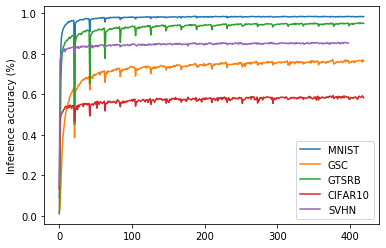

In [37]:
plt.plot(MNIST, label="MNIST")
plt.plot(GSC, label="GSC")
plt.plot(GTSRB, label="GTSRB")
plt.plot(CIFAR10, label="CIFAR10")
plt.plot(SVHN, label="SVHN")
plt.legend()

plt.ylabel("Inference accuracy (%)")
tikzplotlib.save("joint_optimisation.tex")
# plt.show()